! pip install googletrans==4.0.0rc1

出力された予測値の解釈を行うノートブック（出力されたモデル・予測値の読み込みから）

# 岡本編集

## 必要なライブラリインストール

In [35]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

In [17]:
model = pickle.load(open('./model/RandomForestClassifier_2.pkl', 'rb'))
model

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

## データ読み込み

In [18]:
df = pd.read_csv('./data/processed_df_by_rf.csv')
df.head()

,essay_id,full_text,score,text_len,space_count,word_len_avg,I-cnt,pred
0,000d118,Many people have car where they live. The thin...,3,2677,496,4.388330,1,4
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669,327,4.091463,2,3
2,001ab80,People always wish they had the same technolog...,4,3077,555,4.535971,0,4
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701,446,5.044743,0,4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,380,4.797900,2,3


## モデル解釈

### 特徴量重要度

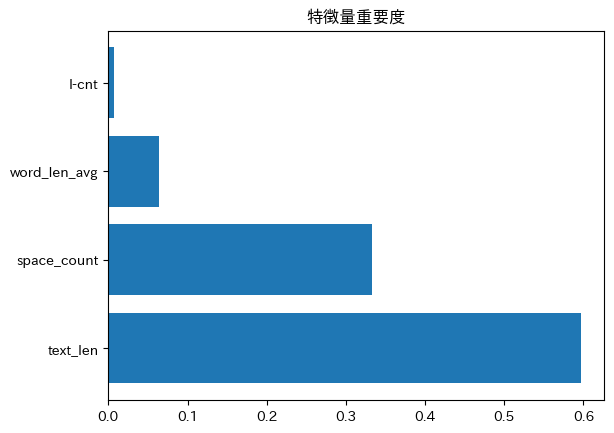

In [16]:
fit, ax = plt.subplots()
ax.barh(model.feature_names_in_, model.feature_importances_)
ax.set_title('特徴量重要度')
plt.show()

### 目的変数との関係性

Text(0.5, 1.0, 'text_len VS pred')

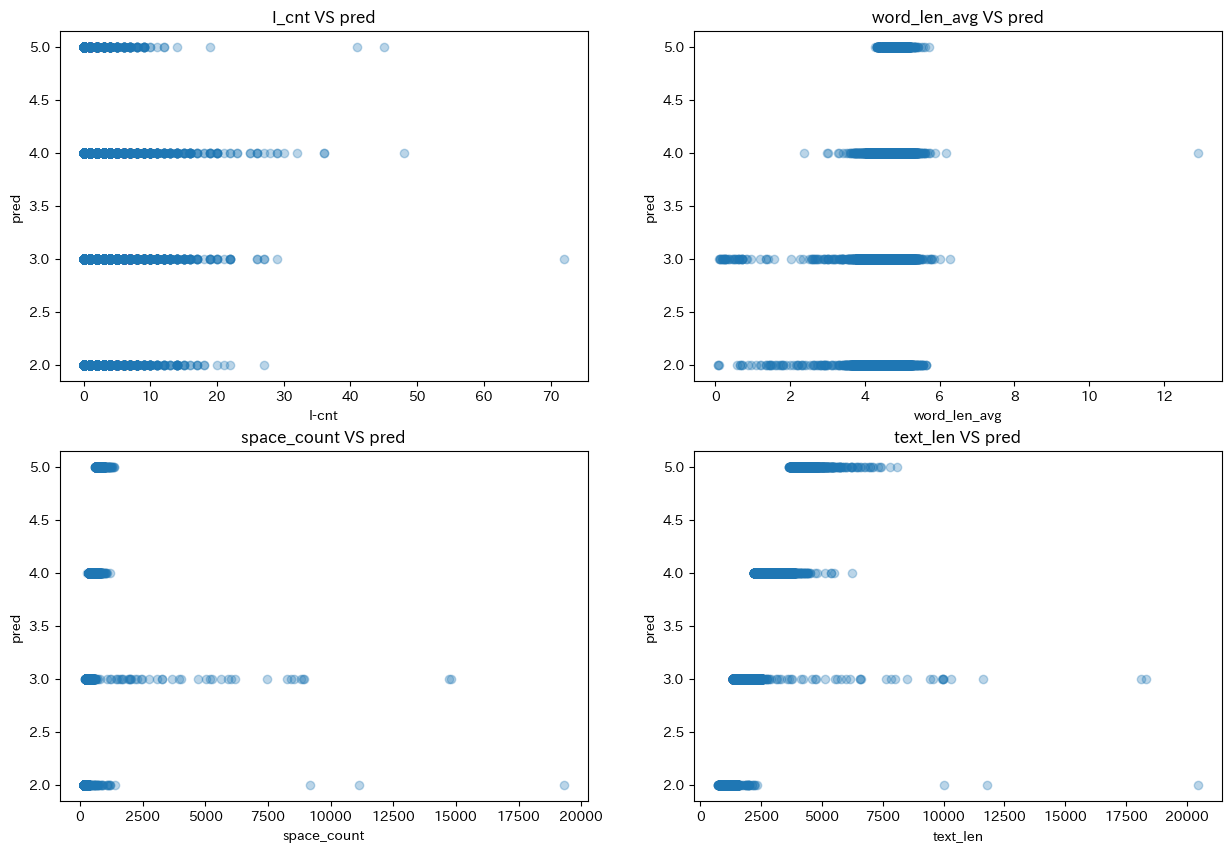

In [30]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(15,10))
ax[0,0].scatter(df['I-cnt'],df.pred,alpha=0.3)
ax[0,0].set_xlabel('I-cnt')
ax[0,0].set_ylabel('pred')
ax[0,0].set_title('I_cnt VS pred')
ax[0,1].scatter(df.word_len_avg,df.pred,alpha=0.3)
ax[0,1].set_xlabel('word_len_avg')
ax[0,1].set_ylabel('pred')
ax[0,1].set_title('word_len_avg VS pred')
ax[1,0].scatter(df.space_count,df.pred,alpha=0.3)
ax[1,0].set_xlabel('space_count')
ax[1,0].set_ylabel('pred')
ax[1,0].set_title('space_count VS pred')
ax[1,1].scatter(df.text_len,df.pred,alpha=0.3)
ax[1,1].set_xlabel('text_len')
ax[1,1].set_ylabel('pred')
ax[1,1].set_title('text_len VS pred')

In [34]:
print(f'目的変数のユニーク：{df.score.unique()}')
print(f'予測値のユニーク：{df.pred.unique()}')

目的変数のユニーク：[3 4 2 1 5 6]
予測値のユニーク：[4 3 2 5]


- かろうじて「text_len」が若干予測値と線形な関係にある
- 予測値のユニークを確認した感じ、「score」の「１」と「６」が全く出力されていないのでそこがうまく学習されていない
- 精度改善の方針としては、「１」と「６」の特徴を見出して新たな特徴量を作成することで学習をしやすくする

### １，６可視化

In [45]:
df_tmp = df.select_dtypes(include=int)
df_tmp.head()

,score,text_len,space_count,I-cnt,pred
0,3,2677,496,1,4
1,3,1669,327,2,3
2,4,3077,555,0,4
3,4,2701,446,0,4
4,3,2208,380,2,3


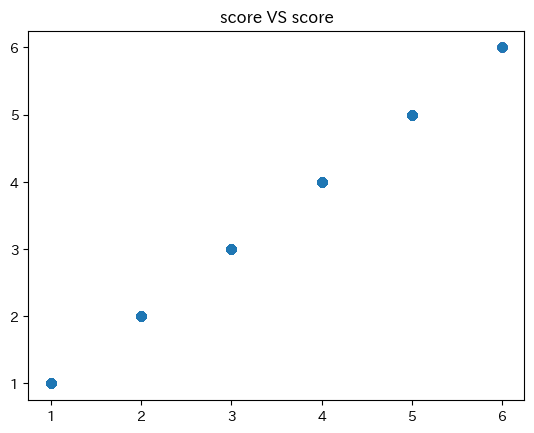

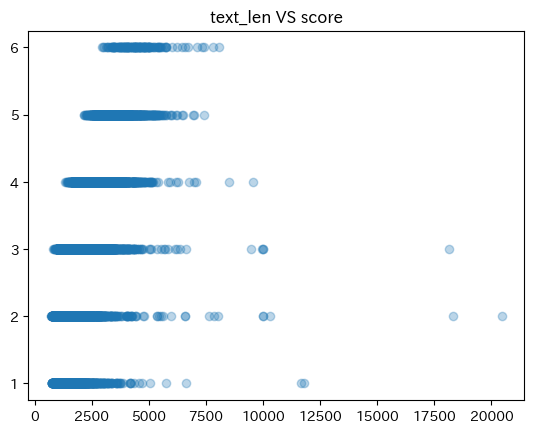

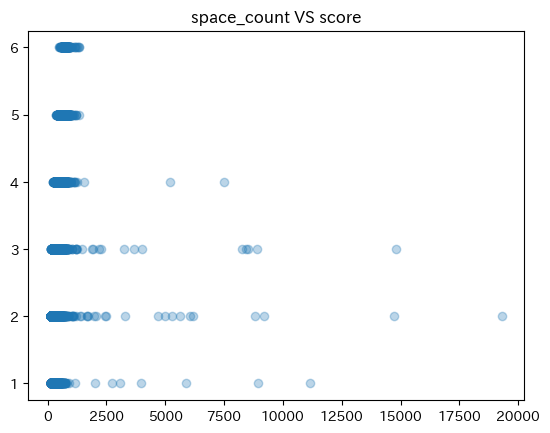

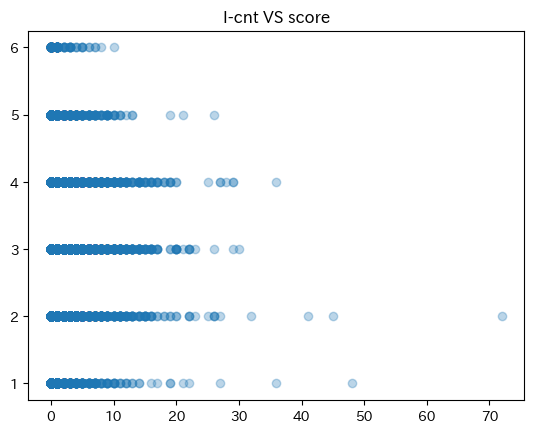

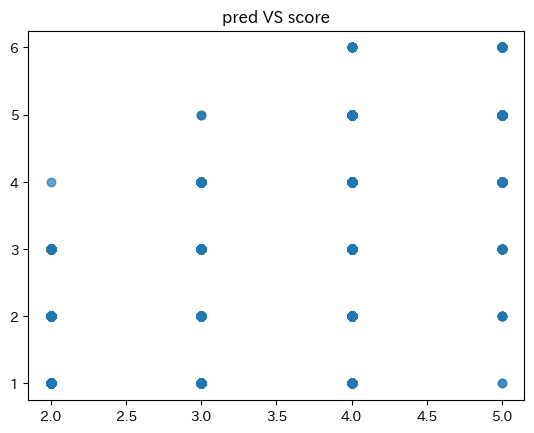

In [47]:
for column in df_tmp.columns:
    plt.scatter(df_tmp[column],df_tmp.score,alpha=0.3)
    plt.title(f'{column} VS score')
    plt.show()